In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle
import numpy as np
import pandas as pd
#import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
#sns.set_style('whitegrid')

In [10]:
X = None
with open('data.pkl', 'r') as f:
    X = cPickle.load(f)

## Sanity check of temperature values

In [11]:
feature = 'TMAX'
tmax_values = np.array([i[1]['vector'] for i in X.iterrows() if i[1]['measurement'] == feature])
tmax_values = tmax_values/10

feature = 'TMIN'
tmin_values = np.array([i[1]['vector'] for i in X.iterrows() if i[1]['measurement'] == feature])
tmin_values = tmin_values/10

feature = 'TOBS'
tobs_values = np.array([i[1]['vector'] for i in X.iterrows() if i[1]['measurement'] == feature])
tobs_values = tobs_values/10

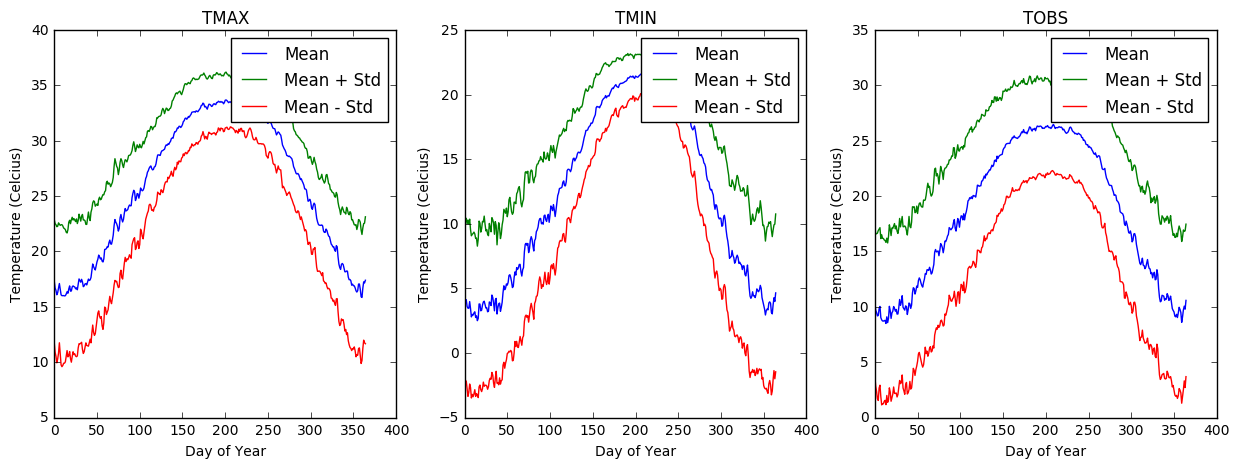

In [16]:
fig, axarr = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(5)

tmax_mean = np.nanmean(tmax_values, dtype = np.float64, axis = 0)
tmax_std = np.nanstd(tmax_values, dtype = np.float64, axis = 0)

axarr[0].plot(tmax_mean, label = 'Mean')
axarr[0].plot(tmax_mean + tmax_std, label = 'Mean + Std')
axarr[0].plot(tmax_mean - tmax_std, label = 'Mean - Std')
axarr[0].legend()
axarr[0].set_title('TMAX')
axarr[0].set_xlabel('Day of Year')
axarr[0].set_ylabel('Temperature (Celcius)')

tmin_mean = np.nanmean(tmin_values, dtype = np.float64, axis = 0)
tmin_std = np.nanstd(tmin_values, dtype = np.float64, axis = 0)

axarr[1].plot(tmin_mean, label = 'Mean')
axarr[1].plot(tmin_mean + tmin_std, label = 'Mean + Std')
axarr[1].plot(tmin_mean - tmin_std, label = 'Mean - Std')
axarr[1].legend()
axarr[1].set_title('TMIN')
axarr[1].set_xlabel('Day of Year')
axarr[1].set_ylabel('Temperature (Celcius)')


tobs_mean = np.nanmean(tobs_values, dtype = np.float64, axis = 0)
tobs_std = np.nanstd(tobs_values, dtype = np.float64, axis = 0)

axarr[2].plot(tobs_mean, label = 'Mean')
axarr[2].plot(tobs_mean + tobs_std, label = 'Mean + Std')
axarr[2].plot(tobs_mean - tobs_std, label = 'Mean - Std')
axarr[2].legend()
axarr[2].set_title('TOBS')
axarr[2].set_xlabel('Day of Year')
axarr[2].set_ylabel('Temperature (Celcius)')


fig.show()

Comparing this to data for the Georgia region at https://weatherspark.com/y/15598/Average-Weather-in-Atlanta-Georgia-United-States, we see agreement. The min, max and obs temperatures all seem within the range of those mentioned in the website.

## Sanity Check Precipitation and Snowfall

In [66]:
feature = 'SNOW'
snow_values = np.array([i[1]['vector'] for i in X.iterrows() if i[1]['measurement'] == feature])
snow_values = snow_values/10

feature = 'SNWD'
snwd_values = np.array([i[1]['vector'] for i in X.iterrows() if i[1]['measurement'] == feature])
snwd_values = snwd_values/10

feature = 'PRCP'
prcp_values = np.array([i[1]['vector'] for i in X.iterrows() if i[1]['measurement'] == feature])
prcp_values = prcp_values/10

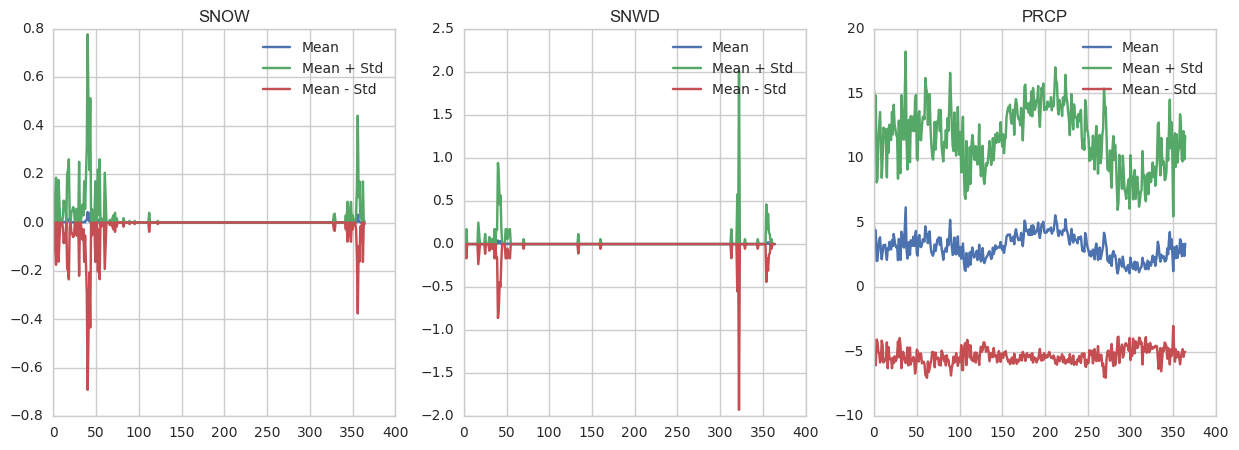

In [68]:
fig, axarr = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(5)

snow_mean = np.nanmean(snow_values, dtype = np.float64, axis = 0)
snow_std = np.nanstd(snow_values, dtype = np.float64, axis = 0)

axarr[0].plot(snow_mean, label = 'Mean')
axarr[0].plot(snow_mean + snow_std, label = 'Mean + Std')
axarr[0].plot(snow_mean - snow_std, label = 'Mean - Std')
axarr[0].legend()
axarr[0].set_title('SNOW')

snwd_mean = np.nanmean(snwd_values, dtype = np.float64, axis = 0)
snwd_std = np.nanstd(snwd_values, dtype = np.float64, axis = 0)

axarr[1].plot(snwd_mean, label = 'Mean')
axarr[1].plot(snwd_mean + snwd_std, label = 'Mean + Std')
axarr[1].plot(snwd_mean - snwd_std, label = 'Mean - Std')
axarr[1].legend()
axarr[1].set_title('SNWD')

prcp_mean = np.nanmean(prcp_values, dtype = np.float64, axis = 0)
prcp_std = np.nanstd(prcp_values, dtype = np.float64, axis = 0)

axarr[2].plot(prcp_mean, label = 'Mean')
axarr[2].plot(prcp_mean + prcp_std, label = 'Mean + Std')
axarr[2].plot(prcp_mean - prcp_std, label = 'Mean - Std')
axarr[2].legend()
axarr[2].set_title('PRCP')

fig.show()

We see that the mean precipitation is around 4 throughout the year. In addition, the amount of precipitation sees a spike during June, July and August. This is again in line with the % chance of precipitation at the weather spark site. We see that the mean snow and snowdepth are very low thoroughout the year. This is again similar to average weather from the weatherspark site. In addition, we see that the standard deviation of snowdepth and snow is very high compared to the mean. We will investigate this in the section on snowfall. The high standard deviation occurs in December, Jan and Feb i.e the winter season. 

## Analyzing snowfall in Georgia
We look at the maximum snowdepth for stations in the following section.

Total instances of snow across years and stations: 48
There are 30 unique stations where there was snowfall
Snowfall occured in the following years: [ 1958.  1960.  1961.  1967.  1968.  1973.  1977.  1978.  1979.  1980.
  1985.  1988.  1989.  1992.  1993.  1996.  2000.  2002.  2009.  2010.]


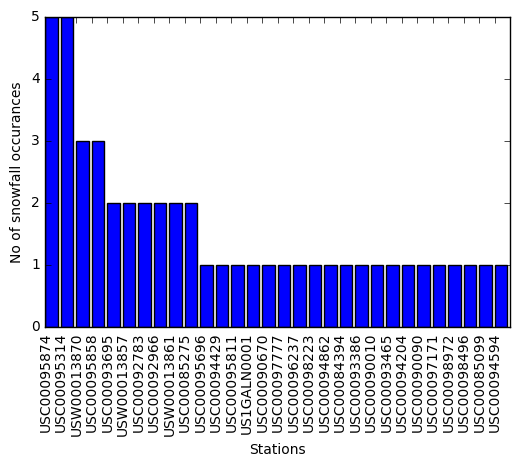

In [3]:
hasSnow = (np.nanmean(np.array(list(X[X['measurement'] == 'SNWD']['vector']), dtype = np.float64), axis = 1) != 0)
print 'Total instances of snow across years and stations: ' + str(sum(hasSnow))

snowDepthData = X[X['measurement'] == 'SNWD'][hasSnow]
hasSnow = (np.nanmean(np.array(list(X[X['measurement'] == 'SNOW']['vector']), dtype = np.float64), axis = 1) != 0)
snowFallData = X[X['measurement'] == 'SNOW'][hasSnow]
print 'There are ' + str(len(np.unique(snowDepthData['station']))) + ' unique stations where there was snowfall'

station, count = zip(*sorted(Counter(snowDepthData['station']).items(), key = lambda x: -x[1]))
print 'Snowfall occured in the following years: ' + str(np.unique(snowDepthData['year']))

plt.bar(range(len(station)), count)
ax = plt.gca()
ax.set_xticks(range(len(station)))
ax.set_xticklabels(station, rotation = 90)
plt.xlabel('Stations')
plt.ylabel('No of snowfall occurances')
plt.show()

Overall we see that snowfall occurances are very rare in this area and they are spread out across different stations. There are a few stations where it seems that snowfall is more likely that others but this concentration is not very significant. We also see that snowfall seems to have occured across the time analyzed and was not localized to any time period. Next we try to analyze the instances of snowfall with PCA and see if the snowdepth can be explained by some interesting seasonal trends. For this purpose, we only look at instances where there was at least some snowfall. Snowdepth is chosen as value for analysis as it is a integral of the snowfall values and hence represents snowfall while being less noisy.

In [4]:
snowMatrix = np.array(list(X[X['measurement'] == 'SNWD']['vector']), dtype = np.float64)#np.array(list(snowDepthData['vector']), dtype = np.float64)
cov = np.nanmean(np.dstack([np.outer(row, row) for row in snowMatrix]), axis = 2)
values, vectors = np.linalg.eig(cov)

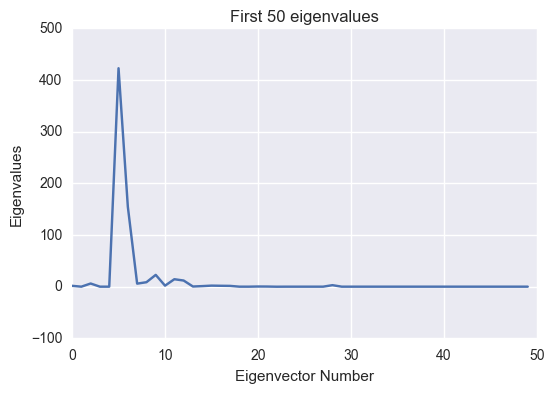

The first ten eigenvalues are: [  1.64175324e+00  -1.49758213e-02   6.10050550e+00  -9.04485301e-03
  -9.82756692e-04   4.22762357e+02   1.54650215e+02   5.85234267e+00
   8.62143788e+00   2.28029403e+01]


In [5]:
plt.plot(values[:50])
plt.xlabel('Eigenvector Number')
plt.ylabel('Eigenvalues')
plt.title('First 50 eigenvalues')
plt.show()
print "The first ten eigenvalues are: " + str(values[:10])

We see erratic bahaviour of the eigenvalues and some eigenvalues are negative. There could be several reasons for this:
* The number of samples which have non zero values of total snowfall are just 48, which is much smaller than the number of variables. This means that there is significant variance in the estimation of the covaraince matrix and thus the non positive definite nature could be a results of this variance. This also means that covariance matrix itself might be unreliable making further analysis of PCA compoenents futile.
* There are a large number of variables that have a constant 0 value. e.g. Summer months where snow never occurs. This could lead to non-positive definite convariance as well. 

We do not further analyze the PCA vectors for snowfall due to this instability.

[(1958.0, 0.13906678865507777), (1960.0, 0.069444444444444448), (1961.0, 0.20994475138121546), (1967.0, 0.18538812785388128), (1968.0, 1.4336782690498588), (1973.0, 0.79582146248812913), (1977.0, 0.1474609375), (1978.0, 0.14049586776859505), (1979.0, 0.49579831932773111), (1980.0, 0.20821917808219179), (1985.0, 0.10410958904109589), (1988.0, 0.068493150684931503), (1989.0, 0.15521472392638036), (1992.0, 0.28021978021978022), (1993.0, 0.13972602739726028), (1996.0, 0.070028011204481794), (2000.0, 0.068870523415977963), (2002.0, 0.20994475138121546), (2009.0, 0.36233951497860201), (2010.0, 0.16245984396512161)]


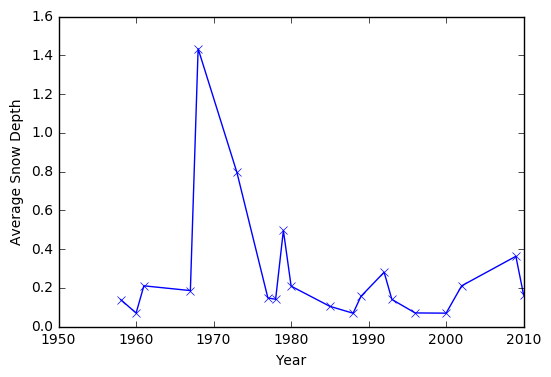

In [7]:
# Mean snowdepth by year
years = []
avg_snwd  = []
for g in snowDepthData.groupby('year'):
    years.append(g[0])
    avg_snwd.append(np.nanmean(np.array(list(g[1]['vector']), dtype = np.float64)))
print zip(years, avg_snwd)

plt.plot(years, avg_snwd, marker = 'x')
plt.ylabel('Average Snow Depth')
plt.xlabel('Year')
#plt.xticks(range(1958, 2010))
plt.show()